<a href="https://colab.research.google.com/github/choiyah/data_analysis/blob/main/DA_food_order.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [NYC Restaurants Data - Food Ordering and Delivery](https://www.kaggle.com/datasets/ahsan81/food-ordering-and-delivery-app-dataset/) 데이터셋 분석



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/food_order.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [ ]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [ ]:
# 결측치 확인
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [ ]:
df.rating.value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [ ]:
# Not given 데이터가 cuisine_type 별로 고르게 분포 => null로 변환 (집계에 포함되지 않음)
df[df.rating.isnull()]['cuisine_type'].value_counts()

American          216
Japanese          197
Italian           126
Chinese            82
Mexican            29
Indian             23
Middle Eastern     15
Mediterranean      14
Thai               10
French              8
Spanish             6
Korean              4
Southern            4
Vietnamese          2
Name: cuisine_type, dtype: int64

In [ ]:
import numpy as np
df['rating'] = df['rating'].replace('Not given', np.nan).astype(float)

In [ ]:
df.rating.value_counts()

5.0    588
4.0    386
3.0    188
Name: rating, dtype: int64

In [ ]:
# rating 컬럼 float형으로 바뀐 것 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


In [ ]:
df.day_of_the_week.value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

In [ ]:
# 주말 1, 평일 0
df['day_of_the_week'] = df['day_of_the_week'].apply(lambda x: 1 if x=='Weekend' else 0)

In [ ]:
df.day_of_the_week.value_counts()

1    1351
0     547
Name: day_of_the_week, dtype: int64

In [ ]:
# 일부 오류난 레스토랑 이름 변경
df.restaurant_name.unique()

array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
       'Blue Ribbon Fried Chicken', 'Dirty Bird to Go',
       'Tamarind TriBeCa', 'The Meatball Shop', 'Barbounia',
       'Anjappar Chettinad', 'Bukhara Grill', 'Big Wong Restaurant',
       'Empanada Mama', 'Pylos', "Lucky's Famous Burgers", 'Shake Shack',
       'Sushi of Gari', 'RedFarm Hudson', 'Blue Ribbon Sushi',
       'Five Guys Burgers and Fries', 'Tortaria', 'Cafe Mogador',
       'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
       'Sushi of Gari 46', 'The Kati Roll Company', 'Klong',
       '5 Napkin Burger', 'TAO', 'Parm', 'Sushi Samba',
       'Haru Gramercy Park', 'Chipotle Mexican Grill', 'RedFarm Broadway',
       'Cafeteria', 'DuMont Burger', "Sarabeth's East",
       'Hill Country Fried Chicken', 'Bistango', "Jack's Wife Freda",
       "Mamoun's Falafel", 'Prosperity Dumpling',
       'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
       'Blue Ribbon Brooklyn', 'Nobu Next Door', 'Osteria Morin

In [ ]:
old_values = ['Big Wong Restaurant \x8c_¤¾Ñ¼', 'Empanada Mama (closed)', 'Chipotle Mexican Grill $1.99 Delivery', "Joe's Shanghai \x8e_À\x8eü£¾÷´", 'Dirty Bird To Go (archived)', 'CafÌ© China']
new_values = ['Big Wong Restaurant', 'Empanada Mama', 'Chipotle Mexican Grill', "Joes Shanghai", 'Dirty Bird To Go', 'Cafe China']
df['restaurant_name'] = df['restaurant_name'].replace(old_values, new_values)

In [ ]:
df.restaurant_name.unique()

array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
       'Blue Ribbon Fried Chicken', 'Dirty Bird to Go',
       'Tamarind TriBeCa', 'The Meatball Shop', 'Barbounia',
       'Anjappar Chettinad', 'Bukhara Grill', 'Big Wong Restaurant',
       'Empanada Mama', 'Pylos', "Lucky's Famous Burgers", 'Shake Shack',
       'Sushi of Gari', 'RedFarm Hudson', 'Blue Ribbon Sushi',
       'Five Guys Burgers and Fries', 'Tortaria', 'Cafe Mogador',
       'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
       'Sushi of Gari 46', 'The Kati Roll Company', 'Klong',
       '5 Napkin Burger', 'TAO', 'Parm', 'Sushi Samba',
       'Haru Gramercy Park', 'Chipotle Mexican Grill', 'RedFarm Broadway',
       'Cafeteria', 'DuMont Burger', "Sarabeth's East",
       'Hill Country Fried Chicken', 'Bistango', "Jack's Wife Freda",
       "Mamoun's Falafel", 'Prosperity Dumpling',
       'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
       'Blue Ribbon Brooklyn', 'Nobu Next Door', 'Osteria Morin

In [ ]:
df[['food_preparation_time', 'delivery_time']]

,food_preparation_time,delivery_time
0,25,20
1,25,23
2,23,28
3,25,15
4,25,24
...,...,...
1893,31,17
1894,31,19
1895,31,24
1896,23,31


In [ ]:
# 총 준비 시간
df['total_prep_time'] = df['food_preparation_time'] + df['delivery_time']

In [ ]:
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_prep_time
0,1477147,337525,Hangawi,Korean,30.75,1,NaN,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,1,NaN,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,0,5.0,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,1,3.0,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,0,4.0,25,24,49
...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill,Mexican,22.31,1,5.0,31,17,48
1894,1477421,397537,The Smile,American,12.18,1,5.0,31,19,50
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,0,NaN,31,24,55
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,0,5.0,23,31,54


In [ ]:
# 총 주문 수
df['order_id'].nunique()

1898

In [ ]:
# 손님 수
df['customer_id'].nunique()

1200

In [ ]:
# 식당 수
df['restaurant_name'].nunique()

178

In [ ]:
# cuisine_type 별 주문 수
df['cuisine_type'].value_counts()

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

In [ ]:
df[df.rating.isnull()]['cuisine_type'].value_counts()

American          216
Japanese          197
Italian           126
Chinese            82
Mexican            29
Indian             23
Middle Eastern     15
Mediterranean      14
Thai               10
French              8
Spanish             6
Korean              4
Southern            4
Vietnamese          2
Name: cuisine_type, dtype: int64

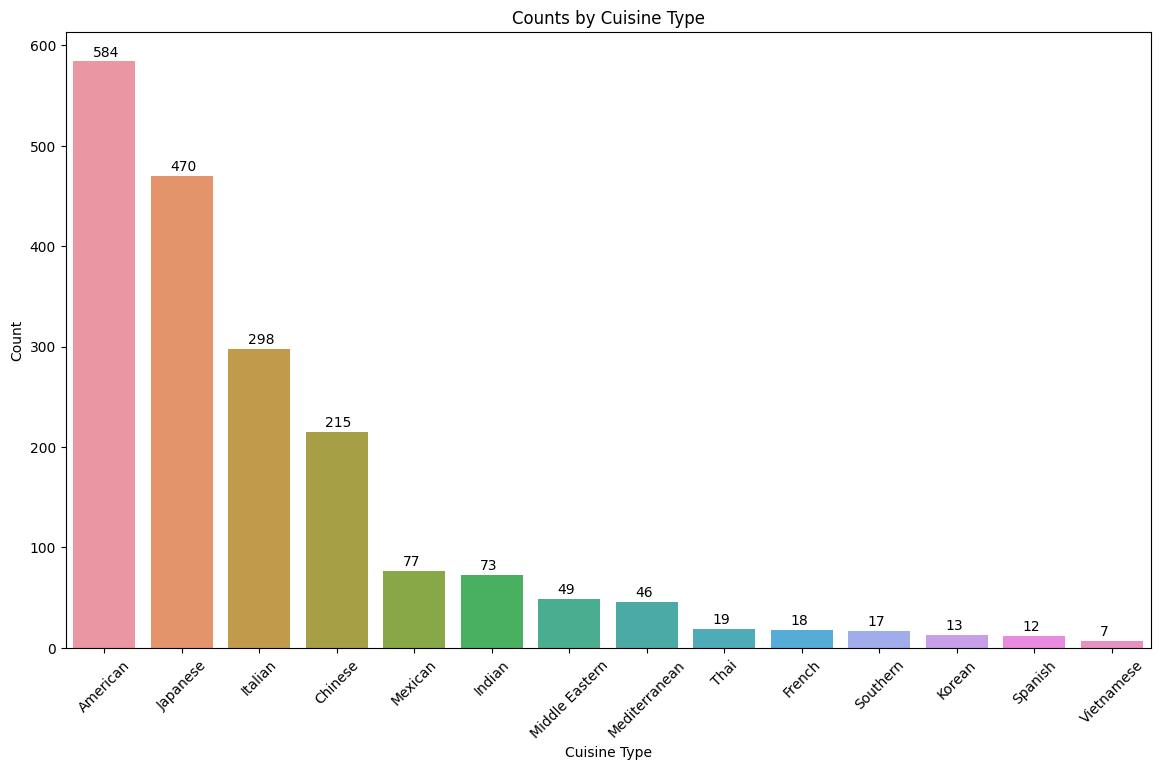

In [ ]:
# cuisine_type별 주문량
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
ax = sns.countplot(data=df, x='cuisine_type', order = df['cuisine_type'].value_counts().index)

for p in ax.patches:
    num = int(p.get_height())
    x = p.get_x() + p.get_width() / 2 - 0.15
    y = p.get_height() + 5
    ax.annotate(num, (x, y))

plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.title('Counts by Cuisine Type')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# cuisine_type 별 식당 수
df.groupby(['cuisine_type'])['restaurant_name'].value_counts()

cuisine_type  restaurant_name            
American      Shake Shack                    219
              Blue Ribbon Fried Chicken       96
              Five Guys Burgers and Fries     29
              Bareburger                      27
              The Meatball Shop               20
                                            ... 
Thai          Rohm Thai                        1
              Spice Thai                       1
Vietnamese    V-Nam Cafe                       4
              Xe May Sandwich Shop             2
              Nha Trang One                    1
Name: restaurant_name, Length: 179, dtype: int64

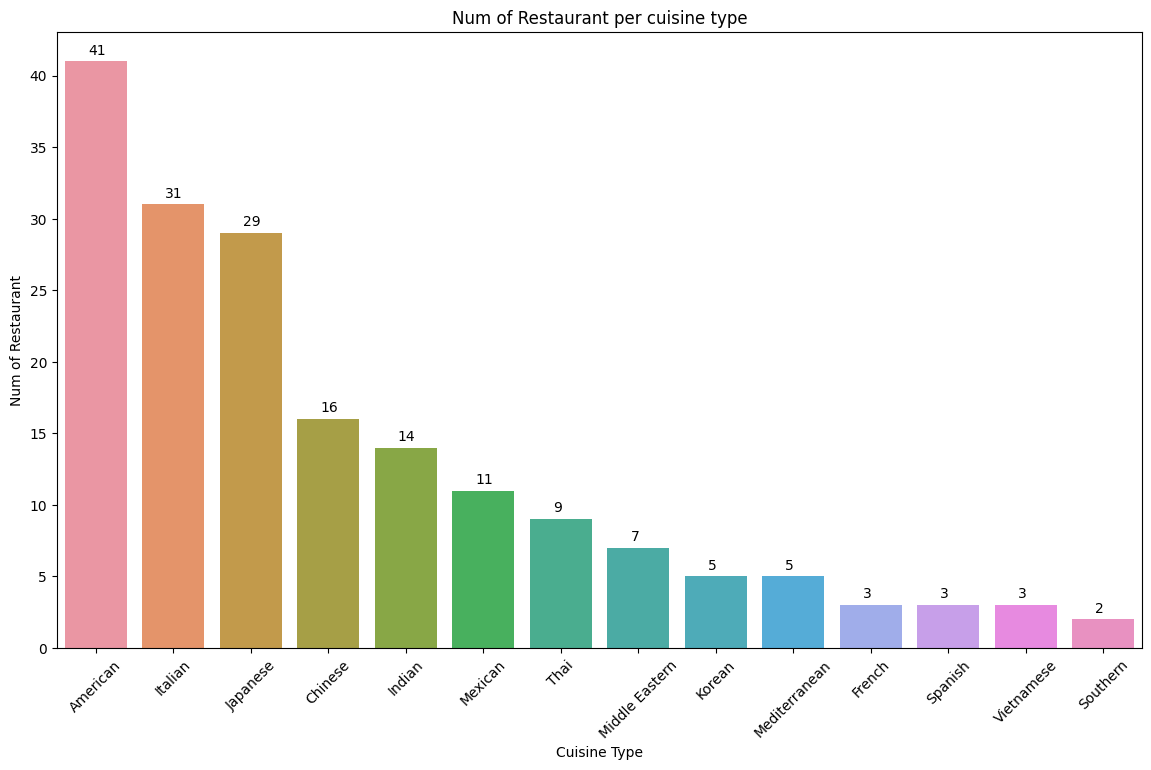

In [ ]:
total_res = df.groupby(['cuisine_type'])['restaurant_name'].nunique().sort_values(ascending=False).reset_index()

plt.figure(figsize=(14, 8))
ax = sns.barplot(data=total_res, x='cuisine_type', y='restaurant_name')

for p in ax.patches:
    num = int(p.get_height())
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height() + 0.5
    ax.annotate(num, (x, y))

plt.xlabel('Cuisine Type')
plt.ylabel('Num of Restaurant')
plt.title('Num of Restaurant per cuisine type')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 식당별 주문량 (top 15 + bottom 15)
order_per_res = df.groupby('restaurant_name')['order_id'].count().to_frame().rename(columns={'order_id':'num_of_orders'})
order_per_res = order_per_res.sort_values(by='num_of_orders', ascending=False).reset_index()

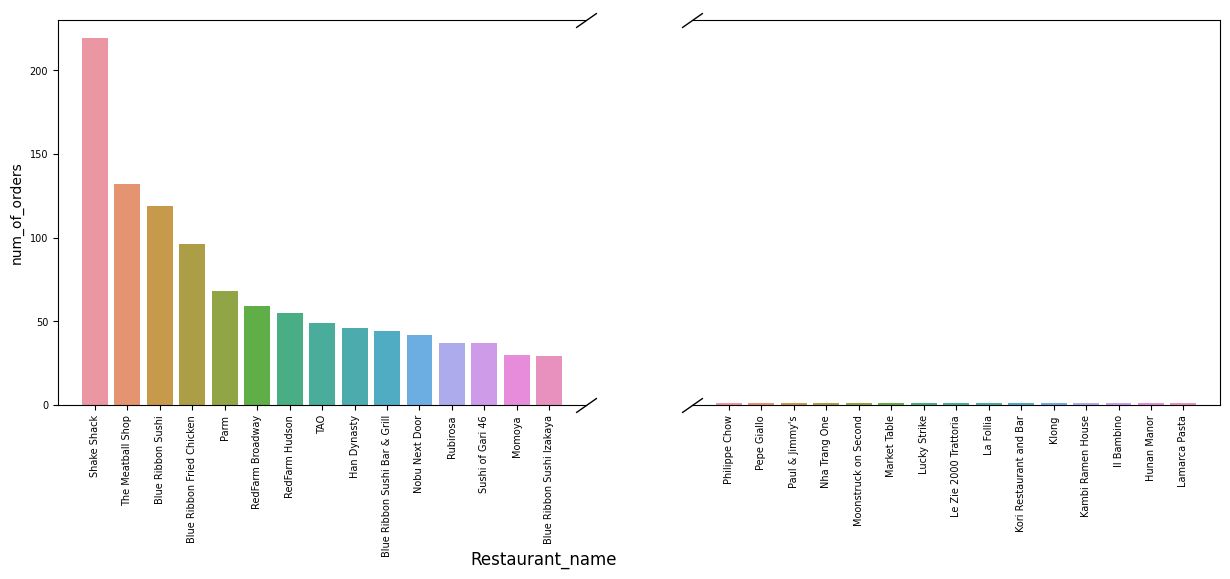

In [ ]:
from matplotlib.patches import Rectangle

f, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, sharex=False, figsize=(15, 5))

ax1.xaxis.grid()
ax2.xaxis.grid()

ax1 = sns.barplot(x='restaurant_name', y="num_of_orders", data=order_per_res.iloc[:15], ax=ax1)
ax2 = sns.barplot(x='restaurant_name', y="num_of_orders", data=order_per_res.iloc[-15:], ax=ax2)

ax1.set_ylim(0, 230)
ax2.set_ylim(0, 230)

ax1.tick_params(labelsize=7)
ax2.tick_params(labelsize=7)

ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax2.get_yaxis().set_visible(False)

d = .7
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=15, linestyle="none", color='k', clip_on=False)
ax1.plot([1, 1], [1, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 0], [1, 0], transform=ax2.transAxes, **kwargs)

ax1.set_xlabel("")
ax2.set_xlabel("")
f.text(0.4, -0.2, "Restaurant_name", va='center', rotation = 'horizontal', fontsize = 12)

for tick in ax1.get_xticklabels()+ax2.get_xticklabels():
    tick.set_rotation(90)

In [ ]:
# cuisine_type별 총 매출 (달러)
df.groupby('cuisine_type')['cost_of_the_order'].sum()

cuisine_type
American          9530.78
Chinese           3505.62
French             356.29
Indian            1235.14
Italian           4892.77
Japanese          7663.13
Korean             182.02
Mediterranean      711.84
Mexican           1303.85
Middle Eastern     922.21
Southern           328.11
Spanish            227.93
Thai               364.95
Vietnamese          90.18
Name: cost_of_the_order, dtype: float64

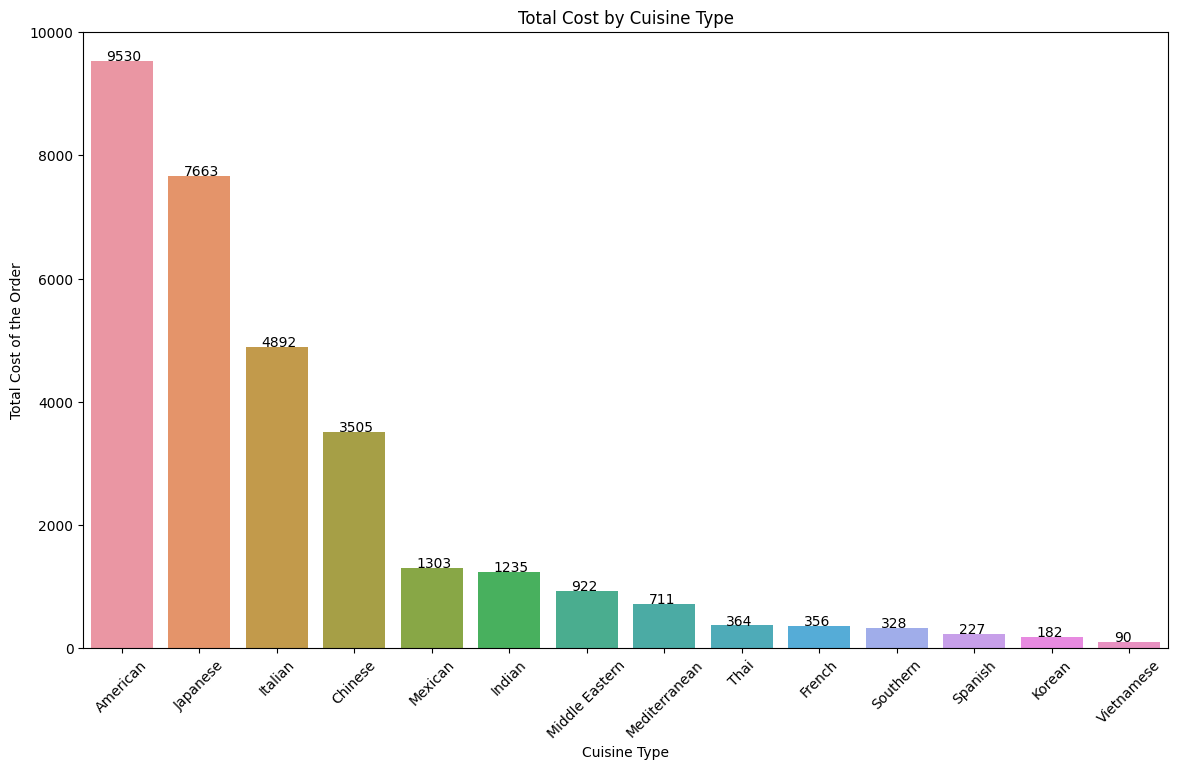

In [ ]:
total_cost = df.groupby('cuisine_type')['cost_of_the_order'].sum().reset_index()
order = total_cost.sort_values(by='cost_of_the_order', ascending=False)['cuisine_type']

plt.figure(figsize=(14, 8))
ax = sns.barplot(data=total_cost, y='cost_of_the_order', x='cuisine_type', order=order)

for p in ax.patches:
    num = int(p.get_height())
    x = p.get_x() + p.get_width() / 2 - 0.2
    y = p.get_height() + 5
    ax.annotate(num, (x, y))

plt.xlabel('Cuisine Type')
plt.ylabel('Total Cost of the Order')
plt.title('Total Cost by Cuisine Type')
plt.xticks(rotation=45)
plt.show()

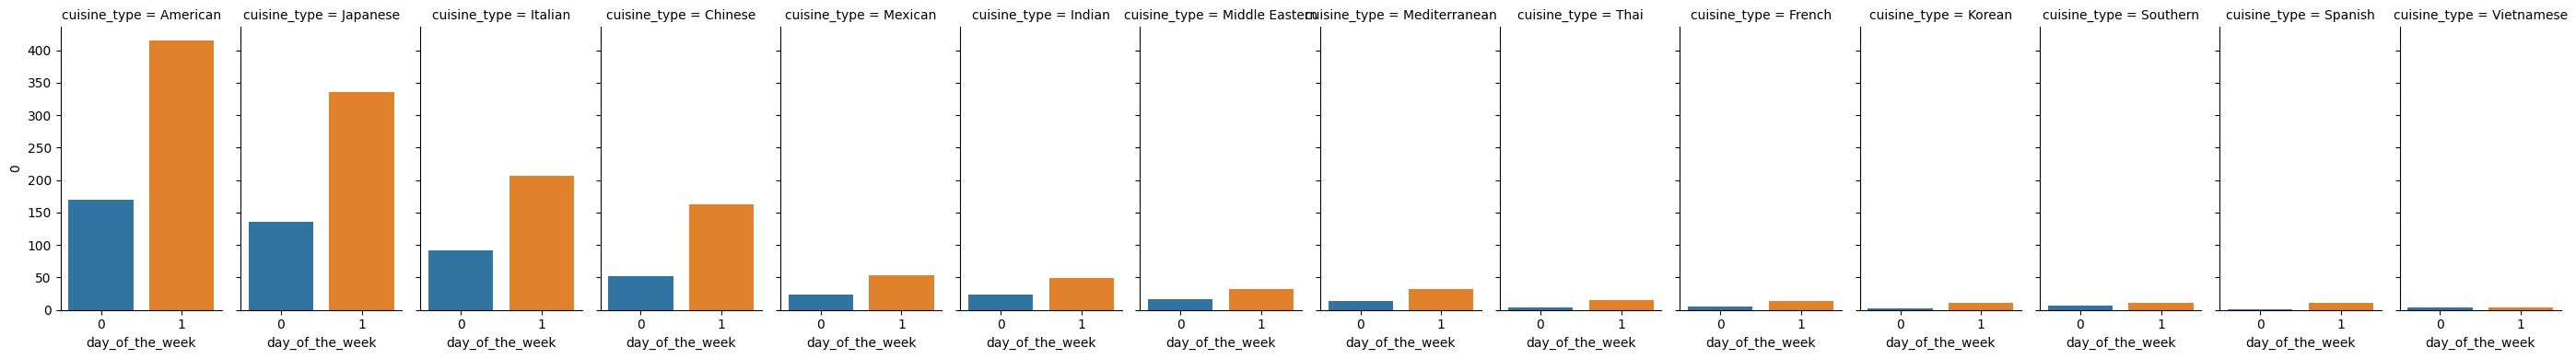

In [ ]:
# cuisine_type 별 주중/주말 주문량
order_by_week = df[['cuisine_type','day_of_the_week']].value_counts().reset_index()
sns.catplot(
    order_by_week,
    kind="bar",
    x="day_of_the_week",
    y=0,
    col="cuisine_type",
    height=4, aspect=.5
)

<ipython-input-42-6ba5f748a0d6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='pearson')


<Axes: >

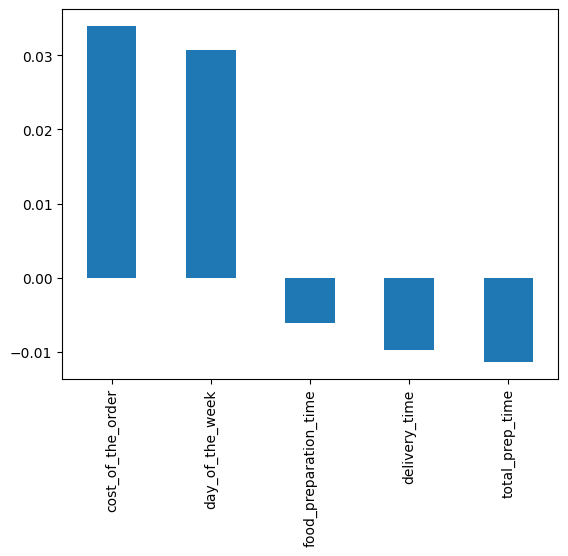

In [ ]:
# rating과의 상관계수 -> 주문 금액이 많고, 주말일 경우 높은 rating을 받았다.
corr = df.corr(method='pearson')
corr['rating'].drop(index=['rating', 'order_id', 'customer_id']).plot.bar()

## 주문량이 많고 적은 식당을 비교 분석
주문량 상위 10위까지의 식당을 A, 주문량이 2개 이하인 식당을 C 그룹으로 나누어 비교 분석

In [ ]:
# 식당별 주문량 데이터프레임 생성
num_order_by_res = df.groupby('restaurant_name')['order_id'].count().to_frame().rename(columns={'order_id':'num_of_order'})

In [ ]:
# 식당별 주문량으로 3그룹 나누기
# 상대구간: (0.999, 2.0] < (2.0, 5.0] < (5.0, 219.0]
pd.qcut(num_order_by_res['num_of_order'], 3, labels=['A', 'B', 'C'][::-1]).value_counts()

C    73
A    58
B    47
Name: num_of_order, dtype: int64

In [ ]:
num_order_by_res['rank_grp'] = pd.qcut(num_order_by_res['num_of_order'], 3, labels=['A', 'B', 'C'][::-1])

In [ ]:
df = df.join(num_order_by_res['rank_grp'], on='restaurant_name')

In [ ]:
num_order_by_res.loc['Shake Shack']

num_of_order    219
rank_grp          A
Name: Shake Shack, dtype: object

In [ ]:
# 상대 구간 0, 2, 5, 219
df.groupby('rank_grp')['cost_of_the_order', 'day_of_the_week', 'rating'].agg(['mean', 'std', 'min', 'median', 'max'])

<ipython-input-64-75d26387e3e9>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('rank_grp')['cost_of_the_order', 'day_of_the_week', 'rating'].agg(['mean', 'std', 'min', 'median', 'max'])


cost_of_the_order                                day_of_the_week  \
                      mean       std   min  median    max            mean   
rank_grp                                                                    
C                16.563854  7.886883  5.67  14.745  32.98        0.677083   
B                17.398750  7.801682  4.66  15.180  35.41        0.681818   
A                16.397608  7.422446  4.47  14.120  34.19        0.717097   

                                     rating                             
               std min median max      mean       std  min median  max  
rank_grp                                                                
C         0.470046   0    1.0   1  4.440678  0.749050  3.0    5.0  5.0  
B         0.467099   0    1.0   1  4.384615  0.741393  3.0    5.0  5.0  
A         0.450548   0    1.0   1  4.334334  0.741236  3.0    4.0  5.0

In [ ]:
df.groupby('rank_grp')['food_preparation_time', 'delivery_time', 'total_prep_time'].agg(['mean', 'std', 'min', 'median', 'max'])

<ipython-input-65-87f275d8c89e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('rank_grp')['food_preparation_time', 'delivery_time', 'total_prep_time'].agg(['mean', 'std', 'min', 'median', 'max'])


food_preparation_time                          delivery_time  \
                          mean       std min median max          mean   
rank_grp                                                                
C                    26.989583  4.711676  20   27.0  35     24.031250   
B                    27.392045  4.882592  20   27.0  35     24.744318   
A                    27.392374  4.601917  20   27.0  35     24.106396   

                                  total_prep_time                           
               std min median max            mean       std min median max  
rank_grp                                                                    
C         5.066823  15   25.0  33       51.020833  7.293803  36   52.0  67  
B         5.111049  15   26.0  33       52.136364  6.796944  36   52.0  67  
A         4.950872  15   25.0  33       51.498770  6.809789  35   52.0  68

상대구간의 경우 중간그룹 B가 주문량 2초과 5이하으로 나뉘었다.
주문량이 매우 적다고 판단되어 A그룹에 상위 10개 식당만 포함되도록 구간을 나누어주었다.

- A그룹 42초과 250이하 (최대 주문량 219)
- B그룹 2초과 42이하
- C그룹 0초과 10이하

In [ ]:
# bins=[0, 2, 42, 250]
num_order_by_res['rank_grp'] = pd.cut(num_order_by_res['num_of_order'], bins=[0, 2, 42, 250], labels=['A', 'B', 'C'][::-1])

In [ ]:
num_order_by_res.loc['Shake Shack']

num_of_order    219
rank_grp          A
Name: Shake Shack, dtype: object

In [ ]:
num_order_by_res['rank_grp'].value_counts()

B    95
C    73
A    10
Name: rank_grp, dtype: int64

In [ ]:
df.drop(columns='rank_grp', inplace=True)
df = df.join(num_order_by_res['rank_grp'], on='restaurant_name')

In [ ]:
df.groupby('rank_grp')['cost_of_the_order', 'day_of_the_week', 'rating'].agg(['mean', 'std', 'min', 'median', 'max'])

<ipython-input-70-a691b7892d34>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('rank_grp')['cost_of_the_order', 'day_of_the_week', 'rating'].agg(['mean', 'std', 'min', 'median', 'max'])


cost_of_the_order                                day_of_the_week  \
                      mean       std   min  median    max            mean   
rank_grp                                                                    
C                16.563854  7.886883  5.67  14.745  32.98        0.677083   
B                16.588197  7.557064  4.47  14.120  35.41        0.715847   
A                16.399651  7.369832  4.75  14.120  34.19        0.711387   

                                     rating                             
               std min median max      mean       std  min median  max  
rank_grp                                                                
C         0.470046   0    1.0   1  4.440678  0.749050  3.0    5.0  5.0  
B         0.451257   0    1.0   1  4.361210  0.730875  3.0    5.0  5.0  
A         0.453373   0    1.0   1  4.316081  0.751480  3.0    4.0  5.0

In [ ]:
df.groupby('rank_grp')['food_preparation_time', 'delivery_time', 'total_prep_time'].agg(['mean', 'std', 'min', 'median', 'max'])

<ipython-input-71-87f275d8c89e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('rank_grp')['food_preparation_time', 'delivery_time', 'total_prep_time'].agg(['mean', 'std', 'min', 'median', 'max'])


food_preparation_time                          delivery_time  \
                          mean       std min median max          mean   
rank_grp                                                                
C                    26.989583  4.711676  20   27.0  35     24.031250   
B                    27.333333  4.626455  20   27.0  35     24.178142   
A                    27.453213  4.632768  20   27.0  35     24.158963   

                                  total_prep_time                           
               std min median max            mean       std min median max  
rank_grp                                                                    
C         5.066823  15   25.0  33       51.020833  7.293803  36   52.0  67  
B         4.978506  15   25.0  33       51.511475  6.869734  35   52.0  68  
A         4.961771  15   25.0  33       51.612176  6.749851  35   51.0  68

In [ ]:
rank_grp_old=['A', 'B', 'C']
rank_grp_new=[1,2,3]

df['rank_grp'] = df['rank_grp'].replace(rank_grp_old, rank_grp_new).astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   int64  
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 9   total_prep_time        1898 non-null   int64  
 10  rank_grp               1898 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 163.2+ KB


<ipython-input-74-2665dbbffbfd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='pearson')


<Axes: >

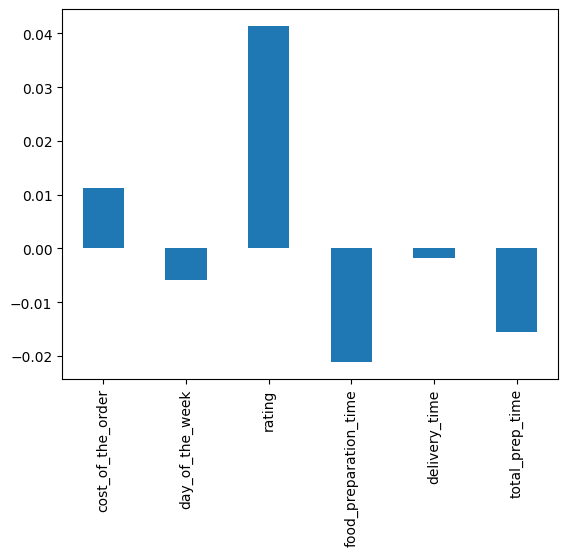

In [ ]:
# 주문량에 따라 나뉜 그룹과 주문 금액, 음식 준비 시간, 평가와의 상관관계가 관찰됨
corr = df.corr(method='pearson')
corr['rank_grp'].drop(index=['rank_grp', 'order_id', 'customer_id']).plot.bar()

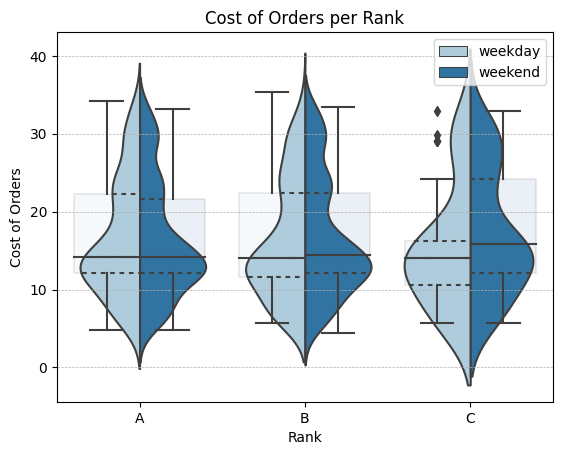

In [ ]:
# rank_grp 별 주문금액의 분포

ax = sns.boxplot(data=df, y='cost_of_the_order', x='rank_grp', hue='day_of_the_week', palette='Paired', color = "w", boxprops=dict(alpha=0.1))
ax = sns.violinplot(data=df, y='cost_of_the_order', x='rank_grp', hue='day_of_the_week', showmedians=True, split=True, inner="quart", palette='Paired', boxprops=dict(alpha=.3))
# sns.swarmplot(x="rank_grp", y="cost_of_the_order", palette='Paired', hue='day_of_the_week', size=3, data=df, ax=ax, dodge=True, linewidth=0.5)

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['weekday', 'weekend'])

plt.ylabel('Cost of Orders')
plt.xlabel('Rank')
plt.title('Cost of Orders per Rank')
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)
ax.set_xticklabels(labels=['A', 'B', 'C'])
plt.show()

A, B 그룹은 주중/주말에서 주문금액이 비슷한 분포가 관찰되었지만,
C 그룹은 주말의 주문금액이 25% / median / 75%가 더 높은 금액대에 분포되어 있다.

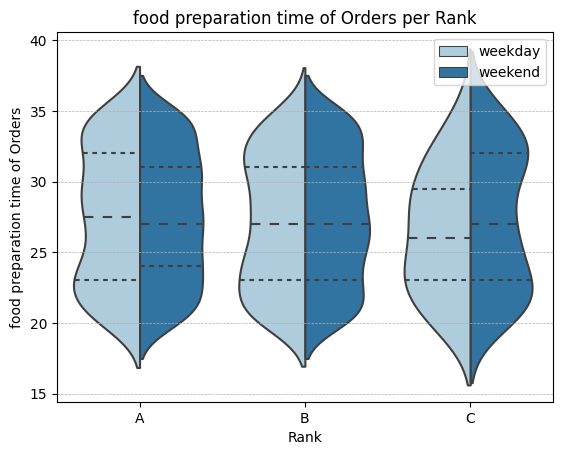

In [ ]:
# rank_grp 별 음식준비시간 분포

# ax = sns.boxplot(data=df, y='food_preparation_time', x='rank_grp', hue='day_of_the_week', palette='Paired', color = "w", boxprops=dict(alpha=.2))
ax = sns.violinplot(data=df, y='food_preparation_time', x='rank_grp', hue='day_of_the_week', showmedians=True, split=True, inner="quart", palette='Paired', boxprops=dict(alpha=.3))
# sns.swarmplot(x="rank_grp", y="food_preparation_time", palette='Paired', hue='day_of_the_week', size=3, data=df, ax=ax, dodge=True, linewidth=0.5)

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['weekday', 'weekend'])

plt.ylabel('food preparation time of Orders')
plt.xlabel('Rank')
plt.title('food preparation time of Orders per Rank')
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)
ax.set_xticklabels(labels=['A', 'B', 'C'])
plt.show()

A 그룹은 주말에 음식 준비 시간이 더 짧게 분포되어 있지만,
C 그룹은 주말의 음식 준비 시간이 더 오래 걸리고 있는 것이 확인 되었다.

In [ ]:
tmp = df.groupby(['rank_grp', 'day_of_the_week', 'rating'])['order_id'].count().reset_index()

In [ ]:
tmp['rank_grp'] = tmp['rank_grp'].replace(rank_grp_new, rank_grp_old)
tmp['day_of_the_week'] = tmp['day_of_the_week'].replace(0, 'Weekday')
tmp['day_of_the_week'] = tmp['day_of_the_week'].replace(1, 'Weekend')

In [ ]:
import plotly.express as px

fig = px.sunburst(tmp, path=['rank_grp', 'day_of_the_week', 'rating'], values='order_id', color='day_of_the_week', width=500, height=500)
fig.update_traces(textinfo="label+percent parent")
fig.show()

A그룹은 주말과 주중의 평점 5점이 4% 차이를 보였지만, C 그룹은 주말과 주중의 평점 5점이 9% 차이를 보였다.




**A 그룹의 경우, 주말 주문량이 주중의 약 3배나 되지만, 평점과 음식 준비 시간이 큰 차이가 보이지 않는 것으로 보아**


**주말 주문량에 대한 대비를 하여 서비스 품질이 유지되도록 조치를 하는 것으로 판단된다.**